In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float

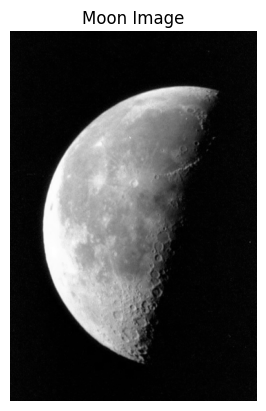

In [4]:
# a. Read and display image

moon = img_as_float(io.imread("moon.tif"))

plt.imshow(moon, cmap="gray")
plt.title("Moon Image")
plt.axis("off")
plt.show()

In [ ]:
# b. Data Structure

print("Shape:", moon.shape)
print("Data type:", moon.dtype)

print("Min pixel value:", moon.min())
print("Max pixel value:", moon.max())
print("\nTop-left 5x5 pixel block:")
print(moon[:5, :5])

Shape: (537, 358)
Data type: float64
Min pixel value: 0.0
Max pixel value: 0.9921568627450981

Top-left 5x5 pixel block:
[[0.00392157 0.01176471 0.02745098 0.01960784 0.00784314]
 [0.01176471 0.02745098 0.01176471 0.01176471 0.01568627]
 [0.02352941 0.01568627 0.02352941 0.01960784 0.00784314]
 [0.02745098 0.01960784 0.02745098 0.02745098 0.01960784]
 [0.00784314 0.01960784 0.01176471 0.02352941 0.02745098]]


In [7]:
# c + d. Perform amd store SVD

U, S, VT = np.linalg.svd(moon, full_matrices=False)

print("U shape:", U.shape)
print("S shape:", S.shape)
print("VT shape:", VT.shape)

print("\nTop-left 5x5 block of U:")
print(U[:5, :5])
print("\nFirst 10 singular values:")
print(S[:10])
print("\nTop-left 5x5 block of VT:")
print(VT[:5, :5])

U shape: (537, 358)
S shape: (358,)
VT shape: (358, 358)

Top-left 5x5 block of U:
[[-6.97870366e-04 -6.97707823e-04 -1.50235171e-03  1.26120278e-05
   1.73503856e-03]
 [-8.36009772e-04 -8.28752393e-04 -1.63330517e-03 -1.68537748e-04
   1.60766928e-03]
 [-7.73184261e-04 -5.74859310e-04 -1.72188532e-03 -2.70011985e-04
   1.25887711e-03]
 [-7.55333390e-04 -5.14543807e-04 -1.62043096e-03 -1.80008061e-04
   1.60253955e-03]
 [-7.96445846e-04 -6.54628965e-04 -1.86463121e-03 -5.66523095e-05
   2.15546344e-03]]

First 10 singular values:
[144.48688375  50.23003683  35.46956411  21.67428614  16.48952157
  12.89018452  10.86782496   9.18106444   8.11430069   7.18146101]

Top-left 5x5 block of VT:
[[-2.65587911e-03 -3.20743551e-03 -2.93511274e-03 -2.65149605e-03
  -2.72155179e-03]
 [-1.86725445e-03 -2.02239230e-03 -1.53148903e-03 -1.84290010e-03
  -1.70470153e-03]
 [-5.63864121e-04  5.11927004e-04 -7.63562714e-04  1.66117200e-04
  -3.64398222e-04]
 [-1.40961123e-03 -1.15541386e-03 -1.93228494e-03

In [8]:
# e. Low-rank approximation

def low_rank_approx(U, S, VT, k):
    return (U[:, :k] @ np.diag(S[:k]) @ VT[:k, :])

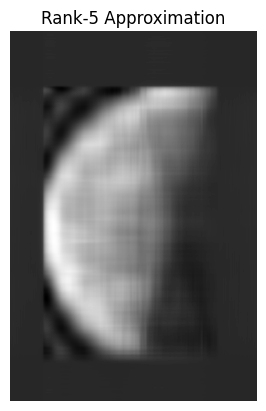

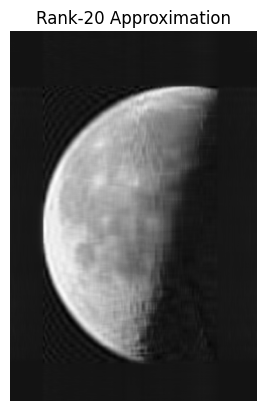

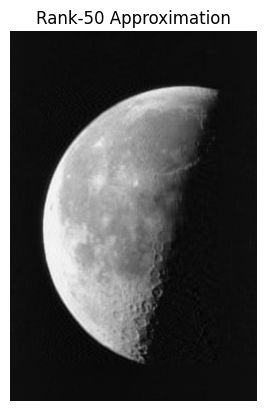

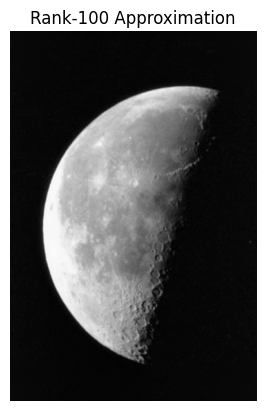

In [11]:
# f. Compress using different ranks

ranks = [5, 20, 50, 100]
compressed_images = []

for k in ranks:
    Ak = low_rank_approx(U, S, VT, k)
    compressed_images.append(Ak)
    plt.imshow(Ak, cmap="gray")
    plt.title(f"Rank-{k} Approximation")
    plt.axis("off")
    plt.show()

In [18]:
# g. Compute PSNR

def rmse(original, approx):
    return np.sqrt(np.mean((original - approx) ** 2))
def psnr(original, approx, max_range=1.0):
    rmse_val = rmse(original, approx)
    return 10 * np.log10((max_range ** 2) / rmse_val)

print("\nPSNR Table:")
print("Rank | PSNR")
for k, Ak in zip(ranks, compressed_images):
    psnr_val = psnr(moon, Ak, max_range=1.0)
    print(f"{k:4d} | {psnr_val:.2f}")


PSNR Table:
Rank | PSNR
   5 | 11.73
  20 | 15.51
  50 | 18.68
 100 | 21.80


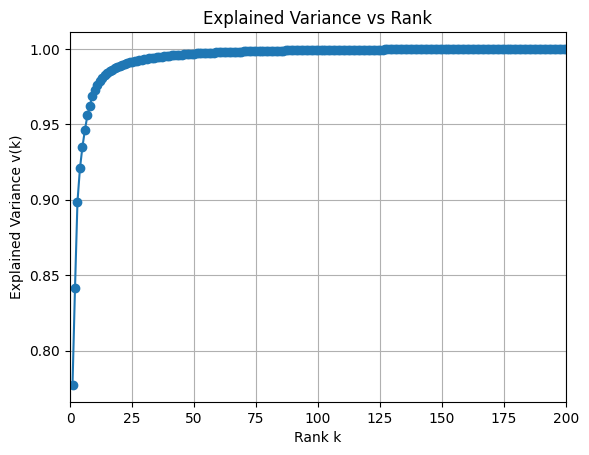

In [34]:
# h. Explained variance

fro_norm = np.linalg.norm(S)
explained_var = np.cumsum(S**2) / np.sum(S**2)

plt.plot(np.arange(1, len(S)+1), explained_var, marker="o")
plt.xlabel("Rank k")
plt.xlim(0, 200)
plt.ylabel("Explained Variance v(k)")
plt.title("Explained Variance vs Rank")
plt.grid(True)
plt.show()

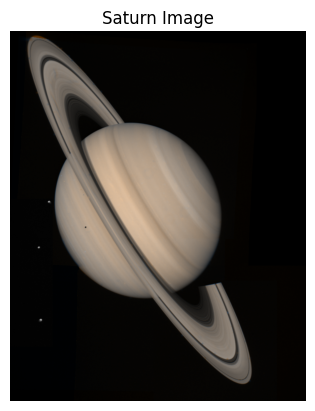

In [28]:
# i. Color image compression

saturn = img_as_float(io.imread("saturn.png"))
fig, ax = plt.subplots(1, 1)
ax.imshow(saturn)
ax.set_title("Saturn Image")
ax.axis("off")
plt.show()

In [29]:
print(" Shape:", saturn.shape)
print(" Data type:", saturn.dtype)

 Shape: (1500, 1200, 3)
 Data type: float64


In [ ]:
channels = ["Red", "Green", "Blue"]
svd_results = []

for i, ch in enumerate(channels):
    U, S, VT = np.linalg.svd(saturn[:, :, i], full_matrices=False)
    svd_results.append((U, S, VT))
    print(f"\n{ch} channel:")
    print(" U shape:", U.shape)
    print(" S shape:", S.shape)
    print(" VT shape:", VT.shape)

In [ ]:
def compress_color_image(image, k):
    compressed_channels = []
    for i in range(3):
        U, S, VT = svd_results[i]  # reuse precomputed SVD
        channel_k = low_rank_approx(U, S, VT, k)
        compressed_channels.append(channel_k)
    return np.stack(compressed_channels, axis=2)

In [ ]:
color_ranks = [5, 20, 50, 100]
compressed_images = []
for k in color_ranks:
    saturn_k = compress_color_image(saturn, k)
    compressed_images.append(saturn_k)
    plt.imshow(np.clip(saturn_k, 0, 1))
    plt.title(f"Saturn Rank-{k}")
    plt.axis("off")
    plt.show()

In [ ]:
print("\nPSNR Table for Saturn:")
print("Rank |    PSNR")
print("-" * 35)
for k, Ak in zip(color_ranks, compressed_images):
    psnr_val = psnr(saturn, Ak, max_range=1.0)
    print(f"{k:4d} | {psnr_val:8.2f}")

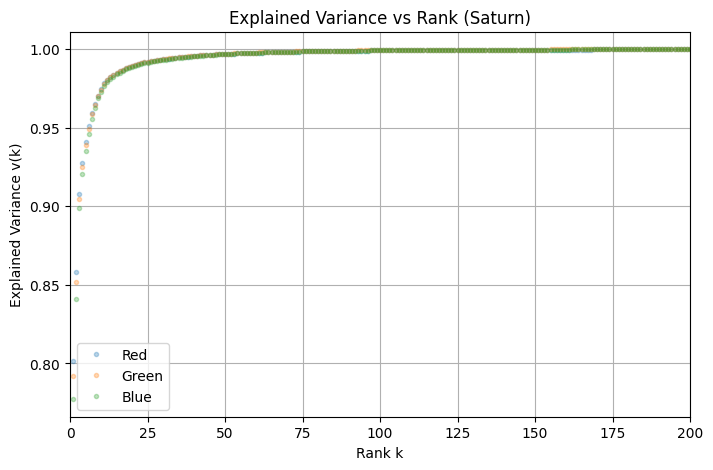

In [37]:
plt.figure(figsize=(8,5))
for i, (U, S, VT) in enumerate(svd_results):
    explained_var = np.cumsum(S**2) / np.sum(S**2)
    ranks = np.arange(1, len(S)+1)

    plt.plot(ranks, explained_var,
             linestyle="none", marker="o", markersize=3,
             alpha=0.3,
             label=channels[i])

plt.xlabel("Rank k")
plt.xlim(0, 200)
plt.ylabel("Explained Variance v(k)")
plt.title("Explained Variance vs Rank (Saturn)")
plt.legend()
plt.grid(True)
plt.show()

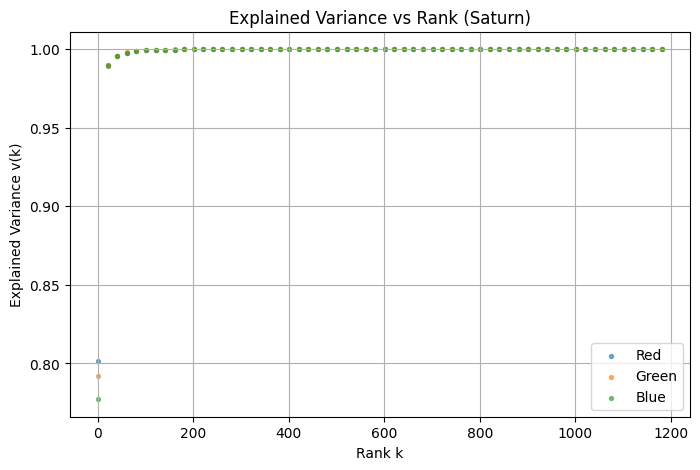

In [38]:
step = 20
plt.figure(figsize=(8,5))
for i, (U, S, VT) in enumerate(svd_results):
    explained_var = np.cumsum(S**2) / np.sum(S**2)
    ranks = np.arange(1, len(S)+1)
    plt.scatter(ranks[::step], explained_var[::step], 
                s=8, alpha=0.6, label=channels[i])
plt.xlabel("Rank k")
plt.ylabel("Explained Variance v(k)")
plt.title("Explained Variance vs Rank (Saturn)")
plt.legend()
plt.grid(True)
plt.show()